In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings('ignore')

# imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica da avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo regressão linear
from sklearn.linear_model import Ridge # algoritmo regularização ridge
from sklearn.linear_model import Lasso # algoritmo regularização lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algorito árvore de regressão
from sklearn.svm import SVR #algoritmo SVM

In [ ]:
# carga do dataset

diabetes = load_diabetes()
dataset = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # conversão para dataframe
dataset['target']=diabetes.target # adição da coluna target

dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# preparação dos dados

# seperação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:10] # atributos
y = array[:,10] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=7) # faz a divisão

# criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

LR: MSE 3066.49 (612.06) - RMSE 55.38
Ridge: MSE 3566.43 (805.54) - RMSE 59.72
Lasso: MSE 3948.91 (890.99) - RMSE 62.84
KNN: MSE 3522.14 (721.76) - RMSE 59.35
CART: MSE 6431.26 (1584.05) - RMSE 80.20
SVM: MSE 5285.09 (1186.18) - RMSE 72.70


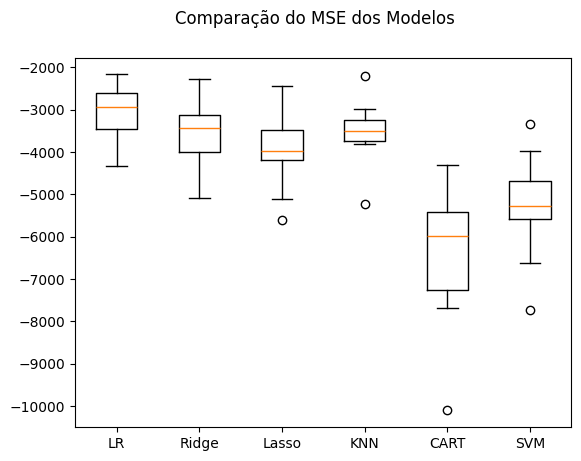

In [ ]:
# modelagem

# definindo uma seed global para esta célula de código
np.random.seed(7)

# listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# fazendo as predições com o conjunto de teste
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 2966.05
RMSE: 54.46
